# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
from sklearn import metrics
from scipy.stats import ks_2samp

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_sick'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_sick
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital)
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   sex        303 non-null    float64
 2   cp         303 non-null    float64
 3   trestbps   303 non-null    float64
 4   chol       303 non-null    float64
 5   fbs        303 non-null    float64
 6   restecg    303 non-null    float64
 7   thalach    303 non-null    float64
 8   exang      303 non-null    float64
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    float64
 11  ca         303 non-null    object 
 12  thal       303 non-null    object 
 13  num        303 non-null    int64  
 14  flag_sick  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,flag_sick
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,1.000000


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [5]:
def bivariate_analysis(df, response_var, explanatory_var):
    """
    Realiza uma análise bivariada entre uma variável resposta e uma variável explicativa qualitativa.
    
    Parâmetros:
    - df: DataFrame contendo os dados a serem analisados.
    - response_var: Nome da variável resposta (string).
    - explanatory_var: Nome da variável explicativa (string).
    
    Retorna:
    - DataFrame com os cálculos de Healthy, Sick, All, Odds, Odds Ratio, Logito e WOE.
    """
    # Tabela cruzada
    tab = pd.crosstab(df[explanatory_var], df[response_var], margins=True)
    tab = tab.rename(columns={0: 'Healthy', 1: 'Sick', 'All': 'All'})
    
    # Odds
    tab['Odds'] = tab['Sick'] / tab['Healthy']
    
    # Odds Ratio (comparado ao total)
    tab['RC_vs_Total'] = tab['Odds'] / tab.loc['All', 'Odds']
    
    # Logito (LOG(Odds))
    tab['logito'] = np.log(tab['Odds'])
    
    # Logito Odds Ratio (Weight of Evidence - WOE)
    tab['logito_ratio'] = np.log(tab['RC_vs_Total'])
    
    return tab

In [6]:
# Aplicando a função para variável qualitativa 'cp': tipo de dor no peito
cp_analysis = bivariate_analysis(df, response_var='flag_sick', explanatory_var='cp')
''' 1: angina típica
    2: angina atípica
    3: dor não-angina
    4: assintomático'''
cp_analysis = cp_analysis.rename(index={1.0: 'angina típica', 2.0: 'angina atípica', 3.0: 'dor não-angina', 4.0: 'assintomático'})
cp_analysis

flag_sick,Healthy,Sick,All,Odds,RC_vs_Total,logito,logito_ratio
cp,,,,,,,
angina típica,16,7,23,0.437500,0.516187,-0.826679,-0.661286
angina atípica,41,9,50,0.219512,0.258993,-1.516347,-1.350955
dor não-angina,68,18,86,0.264706,0.312315,-1.329136,-1.163743
assintomático,39,105,144,2.692308,3.176536,0.990399,1.155791
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


**Discriminação**: 
Os grupos diferem bastante. O grupo "assintomático" possui odds muito maiores (2.692) do que os outros grupos (todos menores que 0.5), mostrando que ele discrimina bem o risco.

In [7]:
# Aplicando a função para variável qualitativa 'fbs': (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
fbs_analysis = bivariate_analysis(df, response_var='flag_sick', explanatory_var='fbs')
fbs_analysis = fbs_analysis.rename(index={0.0: 'True', 1.0: 'False'})
fbs_analysis

flag_sick,Healthy,Sick,All,Odds,RC_vs_Total,logito,logito_ratio
fbs,,,,,,,
True,141,117,258,0.829787,0.979030,-0.186586,-0.021193
False,23,22,45,0.956522,1.128558,-0.044452,0.120941
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


**Discriminação**: 
Os odds entre os dois grupos são bem próximos (0.829 vs. 0.956), indicando que essa variável não discrimina bem o risco.

In [8]:
# Aplicando a função para variável qualitativa 'exang': angina induzida por exercício(1 = sim; 0 = não)
exang_analysis = bivariate_analysis(df, response_var='flag_sick', explanatory_var='exang')
exang_analysis = exang_analysis.rename(index={0.0: 'Yes', 1.0: 'No'})
exang_analysis

flag_sick,Healthy,Sick,All,Odds,RC_vs_Total,logito,logito_ratio
exang,,,,,,,
Yes,141,63,204,0.446809,0.527170,-0.805625,-0.640233
No,23,76,99,3.304348,3.898655,1.195239,1.360632
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


**Discriminação**: 
Existe uma grande diferença entre os grupos. O grupo "No" (3.304) possui odds significativamente maiores que "Yes" (0.446), mostrando que essa variável discrimina bem o risco.

Das 3 analises feitas, a que parece discriminar mais risco é a variavel 'exang'(angina induzida por exercício) pois o resultado NO é aproximadamente 7.4 vezes maior que o YES.

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [9]:
def bivariate_analysis_continuous(df, response_var, explanatory_var, num_categories=5):
    """
    Realiza uma análise bivariada para uma variável contínua categorizando-a em grupos.
    
    Parâmetros:
    - df: DataFrame contendo os dados a serem analisados.
    - response_var: Nome da variável resposta (string).
    - explanatory_var: Nome da variável explicativa (string).
    - num_categories: Número de categorias/grupos desejados para dividir a variável contínua (default = 5).
    
    Retorna:
    - DataFrame com os cálculos de Healthy, Sick, All, Odds, Odds Ratio, Logito e WOE.
    """
    # Categorizando a variável contínua em grupos
    df['group'] = pd.qcut(df[explanatory_var], num_categories, duplicates='drop')
    
    # Tabela cruzada para a variável categorizada
    tab = pd.crosstab(df['group'], df[response_var], margins=True)
    tab = tab.rename(columns={0: 'Healthy', 1: 'Sick', 'All': 'All'})
    
    # Odds
    tab['Odds'] = tab['Sick'] / tab['Healthy']
    
    # Odds Ratio (comparado ao total)
    tab['RC_vs_Total'] = tab['Odds'] / tab.loc['All', 'Odds']
    
    # Logito (LOG(Odds))
    tab['logito'] = np.log(tab['Odds'])
    
    # Logito Odds Ratio (Weight of Evidence - WOE)
    tab['logito_ratio'] = np.log(tab['RC_vs_Total'])
    
    return tab

In [10]:
#Aplicando a função variáveis quantitativas contínuas de 'age'(idade):
age_analysis = bivariate_analysis_continuous(df, response_var='flag_sick', explanatory_var='age', num_categories=5)
age_analysis

flag_sick,Healthy,Sick,All,Odds,RC_vs_Total,logito,logito_ratio
group,,,,,,,
"(28.999, 45.0]",47,16,63,0.340426,0.401653,-1.077559,-0.912166
"(45.0, 53.0]",42,22,64,0.523810,0.618020,-0.646627,-0.481235
"(53.0, 58.0]",32,39,71,1.218750,1.437950,0.197826,0.363218
"(58.0, 62.0]",13,32,45,2.461538,2.904261,0.900787,1.066179
"(62.0, 77.0]",30,30,60,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


In [11]:
#Aplicando a função variáveis quantitativas contínuas de 'trestbps': pressão sanguínea em repouso (em mm Hg na admissão ao hospital)
trestbps_analysis = bivariate_analysis_continuous(df, response_var='flag_sick', explanatory_var='trestbps', num_categories=5)
trestbps_analysis

flag_sick,Healthy,Sick,All,Odds,RC_vs_Total,logito,logito_ratio
group,,,,,,,
"(93.999, 120.0]",60,37,97,0.616667,0.727578,-0.483427,-0.318034
"(120.0, 126.0]",10,15,25,1.500000,1.769784,0.405465,0.570858
"(126.0, 134.0]",35,27,62,0.771429,0.910175,-0.259511,-0.094119
"(134.0, 144.6]",34,24,58,0.705882,0.832840,-0.348307,-0.182914
"(144.6, 200.0]",25,36,61,1.440000,1.698993,0.364643,0.530036
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


In [12]:
#Aplicando a função variáveis quantitativas contínuas de 'chol': colesterol sérico em mg/dl:
chol_analysis = bivariate_analysis_continuous(df, response_var='flag_sick', explanatory_var='chol', num_categories=5)
chol_analysis

flag_sick,Healthy,Sick,All,Odds,RC_vs_Total,logito,logito_ratio
group,,,,,,,
"(125.999, 204.0]",37,25,62,0.675676,0.797200,-0.392042,-0.226650
"(204.0, 230.0]",36,24,60,0.666667,0.786571,-0.405465,-0.240073
"(230.0, 254.0]",36,26,62,0.722222,0.852118,-0.325422,-0.160030
"(254.0, 286.0]",27,32,59,1.185185,1.398348,0.169899,0.335292
"(286.0, 564.0]",28,32,60,1.142857,1.348407,0.133531,0.298924
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


In [13]:
#Aplicando a função variáveis quantitativas contínuas de 'thalach': frequência cardíaca máxima alcançada:
thalach_analysis = bivariate_analysis_continuous(df, response_var='flag_sick', explanatory_var='thalach', num_categories=5)
thalach_analysis

flag_sick,Healthy,Sick,All,Odds,RC_vs_Total,logito,logito_ratio
group,,,,,,,
"(70.999, 130.0]",16,47,63,2.937500,3.465827,1.077559,1.242951
"(130.0, 146.0]",20,39,59,1.950000,2.300719,0.667829,0.833222
"(146.0, 159.0]",39,23,62,0.589744,0.695813,-0.528067,-0.362675
"(159.0, 170.0]",41,21,62,0.512195,0.604317,-0.669050,-0.503657
"(170.0, 202.0]",48,9,57,0.187500,0.221223,-1.673976,-1.508584
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


In [14]:
#Aplicando a função variáveis quantitativas contínuas de 'oldpeak': Depressão de ST induzida por exercício em relação ao repouso:
oldpeak_analysis = bivariate_analysis_continuous(df, response_var='flag_sick', explanatory_var='oldpeak', num_categories=5)
oldpeak_analysis

flag_sick,Healthy,Sick,All,Odds,RC_vs_Total,logito,logito_ratio
group,,,,,,,
"(-0.001, 0.38]",88,33,121,0.375000,0.442446,-0.980829,-0.815437
"(0.38, 1.12]",37,24,61,0.648649,0.765312,-0.432864,-0.267472
"(1.12, 1.9]",30,32,62,1.066667,1.258513,0.064539,0.229931
"(1.9, 6.2]",9,50,59,5.555556,6.554756,1.714798,1.880191
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [15]:
reg_log = smf.logit('flag_sick ~ C(sex) + C(cp) + trestbps + age', data=df).fit()
reg_log.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              flag_sick   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                  0.3097
Time:                        00:07:57   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.3407      1.621     -5.145      0.000     -11.518      -5.163
C(sex)[T.1.0]     1.8094      0.353      5.130      0.000       1.118       2.501
C(cp)[T.2.0]     -0.0617      0.636     -0.097      0.923      -1.309       1.186
C(cp)[T.3.0]      0.0715      0.573      0.125      0.901      -1.051       1.194
C(cp)[T.4.0]      2.4789      0.553      4.485      0.000       1.396       3.562
trestbps          0.0193      0.009      2.261      0.024       0.003       0.036
age               0.0567      0.018      3.120      0.002       0.021       0.092
=================================================================================
"""

**Interpretação dos resultados do modelo de regressão logística**

**Coeficientes**
1. **Intercepto (-8.3407):**
- Representa o log-odds de `flag_sick = 1` quando todas as variáveis explicativas são iguais a zero.
- **Interpretação:** A probabilidade de alguém ser doente quando todas as variáveis estão no valor de referência é extremamente baixa.

2. **Sexo (`C(sex)[T.1.0] = 1.8094`):**
- Este coeficiente representa o impacto de ser do sexo masculino (`sex = 1`) comparado ao sexo feminino (`sex = 0`).
- **Interpretação:** Ser do sexo masculino **aumenta o log-odds** de ser doente em 1.8094.
- Homens têm **6.10 vezes mais chances** de serem doentes do que mulheres, controlando para as outras variáveis.
- **P>|z| = 0.000:** É altamente significativo.

3. **Tipo de dor no peito (`C(cp)`):**
- **Categoria de referência:** Angina típica (`cp = 1.0`).

- **C(cp)[T.2.0] (-0.0617):**
 - Pessoas com **angina atípica** (`cp = 2`) não diferem significativamente da angina típica, pois o p-valor é **0.923** (não significativo).

- **C(cp)[T.3.0] (0.0715):**
 - Pessoas com **dor não-angina** (`cp = 3`) também não apresentam diferenças significativas comparadas à angina típica (p-valor = **0.901**).

- **C(cp)[T.4.0] (2.4789):**
 - Pessoas **assintomáticas** (`cp = 4`) têm um log-odds **muito maior** de serem doentes em comparação àquelas com angina típica.
   
 - **P>|z| = 0.000:** É altamente significativo.

4. **Pressão arterial em repouso (`trestbps` = 0.0193):**
 - Cada aumento de 1 mmHg na pressão arterial em repouso **aumenta o log-odds de ser doente** em 0.0193.
 - Para cada 1 mmHg a mais, a chance de ser doente aumenta em **1.9%**.
     
 - **P>|z| = 0.024:** Significativo ao nível de 5%.


5. **Idade (`age` = 0.0567):**
 - Cada aumento de 1 ano de idade **aumenta o log-odds de ser doente** em 0.0567.
 - Cada ano a mais aumenta a chance de ser doente em **5.8%**.
 - **P>|z| = 0.002:** Altamente significativo.


 **Resumo Geral**
- **Sexo (masculino)** e **idade** são variáveis significativas que aumentam as chances de ser doente.
- **Tipo de dor no peito** é relevante apenas para a categoria "assintomático", que está associada a um risco muito maior.
- **Pressão arterial em repouso** também tem um impacto significativo, mas pequeno, no risco de ser doente.
- Outras categorias de dor no peito (angina atípica e dor não-angina) não se mostraram significativas.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [16]:
#Predito
df['predito'] = reg_log.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_sick,group,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(1.9, 6.2]",0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(1.12, 1.9]",0.944123
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(1.9, 6.2]",0.886566
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(1.9, 6.2]",0.134929
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(1.12, 1.9]",0.027278


In [17]:
#Categorizacao probabilidade em G=5 grupos
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

predito
(0.0131, 0.143]    62
(0.143, 0.287]     59
(0.287, 0.586]     62
(0.586, 0.822]     59
(0.822, 0.944]     61
Name: count, dtype: int64

In [18]:
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_sick']].count().rename(columns = {'flag_sick': 'contagem'})
qualid

,contagem
predito,
"(0.0131, 0.143]",62
"(0.143, 0.287]",59
"(0.287, 0.586]",62
"(0.586, 0.822]",59
"(0.822, 0.944]",61


In [19]:
#probabilidade de evento predita média por grupo
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.0131, 0.143]",62,0.072008
"(0.143, 0.287]",59,0.209626
"(0.287, 0.586]",62,0.435175
"(0.586, 0.822]",59,0.708861
"(0.822, 0.944]",61,0.874819


In [20]:
#taxa de eventos (média da variável indicadora de eventos) por grupo
qualid['pct_sick'] = group_reg['flag_sick'].mean()
qualid

,contagem,predito,pct_sick
predito,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


Text(0.5, 0, 'Grupo')

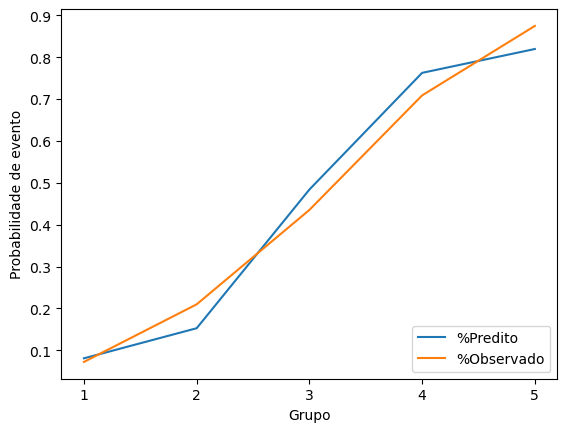

In [21]:
#Grafico do valor eperado versus observado para a taxa de doentes por grupo
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_sick'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

Text(0, 0.5, 'Função Distribuição Acumulada')

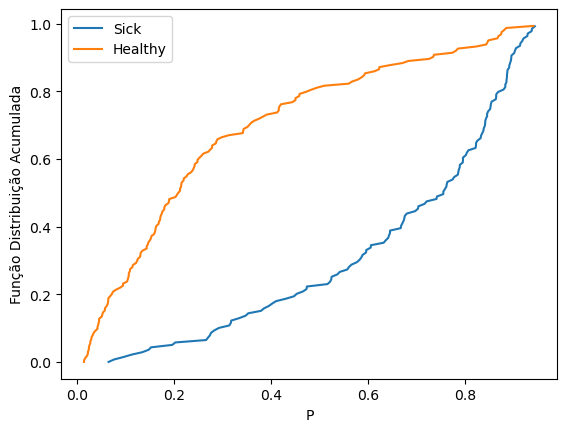

In [22]:
#Grafico KS
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_sick']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Sick')

score_pop2 = df.loc[df['flag_sick']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Healthy')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')

In [23]:
acc = metrics.accuracy_score(df['flag_sick'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_sick'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_sick'] == 1, 'predito'], df.loc[df['flag_sick'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.54%
KS: 59.30% 
AUC: 85.19% 
GINI: 70.39%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [24]:
reg_log2 = smf.logit('flag_sick ~ C(sex) + trestbps + C(cp) + age + C(exang) + oldpeak', data=df).fit()
reg_log2.summary()

Optimization terminated successfully.
         Current function value: 0.418345
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              flag_sick   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                  0.3935
Time:                        00:07:58   Log-Likelihood:                -126.76
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.861e-31
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.4839      1.751     -4.846      0.000     -11.915      -5.053
C(sex)[T.1.0]       1.7184      0.383      4.486      0.000       0.968       2.469
C(cp)[T.2.0]        0.8173      0.684      1.194      0.232      -0.524       2.159
C(cp)[T.3.0]        0.3308      0.607      0.545      0.586      -0.858       1.520
C(cp)[T.4.0]        2.4305      0.595      4.085      0.000       1.264       3.597
C(exang)[T.1.0]     0.9931      0.359      2.763      0.006       0.289       1.698
trestbps            0.0149      0.009      1.579      0.114      -0.004       0.033
age                 0.0487      0.019      2.575      0.010       0.012       0.086
oldpeak             0.7467      0.172      4.343      0.000       0.410       1.084
===================================================================================
"""

In [25]:
#Predito
df['predito'] = reg_log2.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_sick,group,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(1.9, 6.2]",0.544274
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(1.12, 1.9]",0.968382
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(1.9, 6.2]",0.974620
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(1.9, 6.2]",0.478731
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(1.12, 1.9]",0.063552


In [26]:
#Categorizacao probabilidade em G=5 grupos
cat_pred2 = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred2.value_counts().sort_index()

predito
(0.00673, 0.108]    61
(0.108, 0.264]      60
(0.264, 0.56]       61
(0.56, 0.867]       60
(0.867, 0.996]      61
Name: count, dtype: int64

In [27]:
group_reg2 = df.groupby(cat_pred2)
qualid2 = group_reg2[['flag_sick']].count().rename(columns = {'flag_sick': 'contagem'})
qualid2

,contagem
predito,
"(0.00673, 0.108]",61
"(0.108, 0.264]",60
"(0.264, 0.56]",61
"(0.56, 0.867]",60
"(0.867, 0.996]",61


In [28]:
qualid2['predito'] = group_reg2['predito'].mean()
qualid2['pct_sick'] = group_reg2['flag_sick'].mean()
qualid2

,contagem,predito,pct_sick
predito,,,
"(0.00673, 0.108]",61,0.052835,0.065574
"(0.108, 0.264]",60,0.173039,0.183333
"(0.264, 0.56]",61,0.402292,0.393443
"(0.56, 0.867]",60,0.726003,0.716667
"(0.867, 0.996]",61,0.939258,0.934426


Text(0.5, 0, 'Grupo')

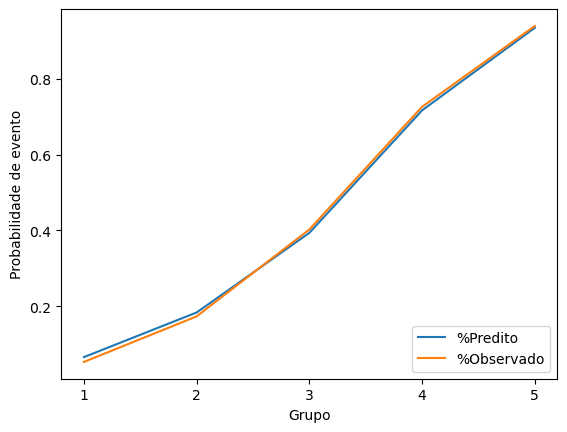

In [29]:
#Grafico do valor eperado versus observado para a taxa de doentes por grupo
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid2['pct_sick'].plot(label='%Predito')
ax = qualid2['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

In [30]:
acc = metrics.accuracy_score(df['flag_sick'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_sick'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_sick'] == 1, 'predito'], df.loc[df['flag_sick'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 81.85%
KS: 64.33% 
AUC: 88.74% 
GINI: 77.49%


O reg_log2 com as variaveis "C(sex) + trestbps + C(cp) + age + C(exang) + oldpeak" teve melhor desempenho que o primeiro modelo.